<a href="https://colab.research.google.com/github/jovinraymond/NLP-PROJECT/blob/main/data_cleaning_%2Ccuration_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import unicodedata
#import contractions
from textblob import TextBlob


In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

loading the Raw data

In [4]:
with open('/content/book corpus.txt', 'r') as file:
    text_data = file.read()

cleaning the data

In [5]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Step 1: Load the text data (assuming it's in a text file)
with open('/content/book corpus.txt', 'r') as file:
    text_data = file.read()

# Step 2: Clean the Data
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    #words = [word for word in words if word not in stopwords.words('english')]
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

cleaned_data = clean_text(text_data)

# Save cleaned data to a text file
with open('cleaned_mental_health_text.txt', 'w') as file:
    file.write(cleaned_data)

print("Cleaned data has been saved to 'cleaned_mental_health_text.txt'")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cleaned data has been saved to 'cleaned_mental_health_text.txt'


plotting stop words

In [6]:
words = word_tokenize(cleaned_data)

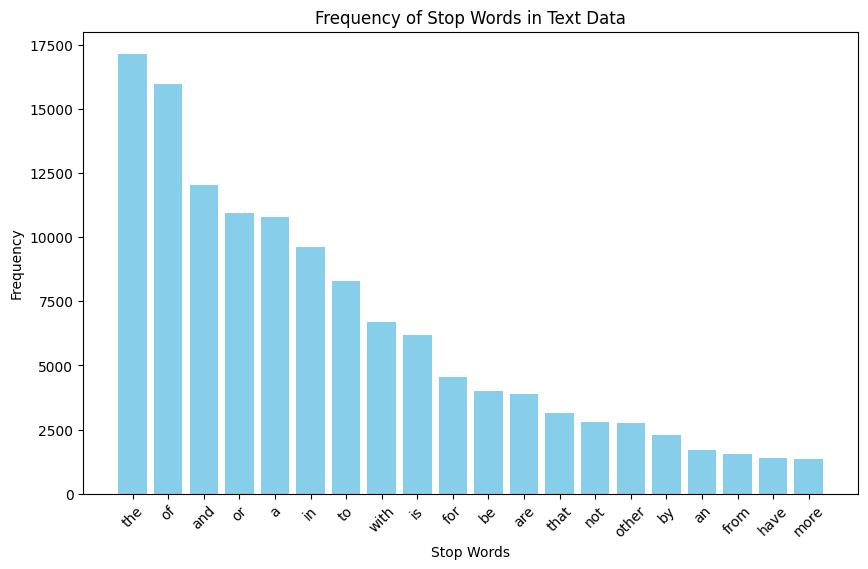

In [7]:
stop_words = set(stopwords.words('english'))
stop_words_in_text = [word for word in words if word in stop_words]

# Count the frequency of stop words
stop_words_freq = Counter(stop_words_in_text)

# Convert to DataFrame for easy plotting
stop_words_df = pd.DataFrame(stop_words_freq.items(), columns=['StopWord', 'Frequency']).sort_values(by='Frequency', ascending=False).head(20)

# Plot the stop words frequency
plt.figure(figsize=(10, 6))
plt.bar(stop_words_df['StopWord'], stop_words_df['Frequency'], color='skyblue')
plt.xlabel('Stop Words')
plt.ylabel('Frequency')
plt.title('Frequency of Stop Words in Text Data')
plt.xticks(rotation=45)
plt.show()

plotting non stop words

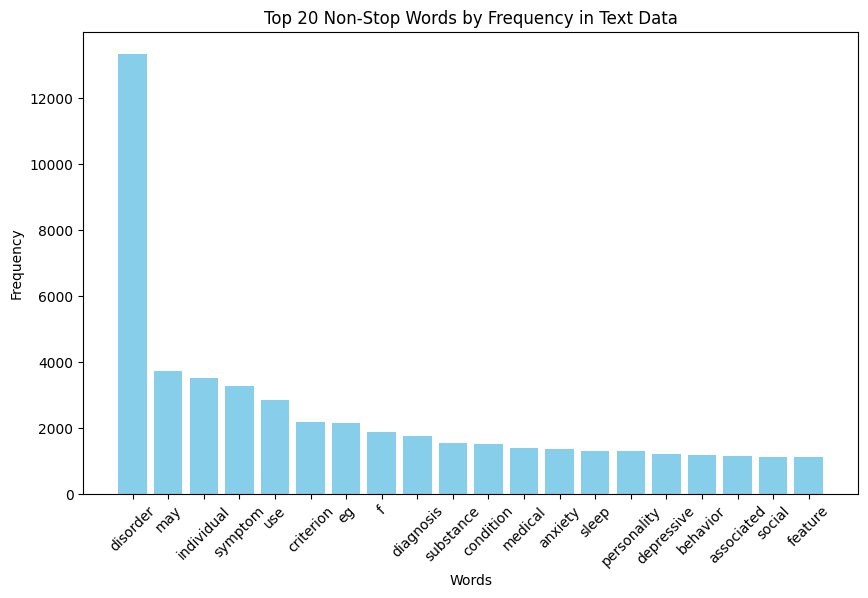

In [8]:
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]
non_stop_words_in_text = [word for word in words if word not in stop_words]

# Step 4: Count the frequency of non-stop words
non_stop_words_freq = Counter(non_stop_words_in_text)

# Step 5: Convert to DataFrame and select top 20 non-stop words
non_stop_words_df = pd.DataFrame(non_stop_words_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False).head(20)

# Plot the top 20 non-stop words frequency
plt.figure(figsize=(10, 6))
plt.bar(non_stop_words_df['Word'], non_stop_words_df['Frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Non-Stop Words by Frequency in Text Data')
plt.xticks(rotation=45)
plt.show()

N grams plotting

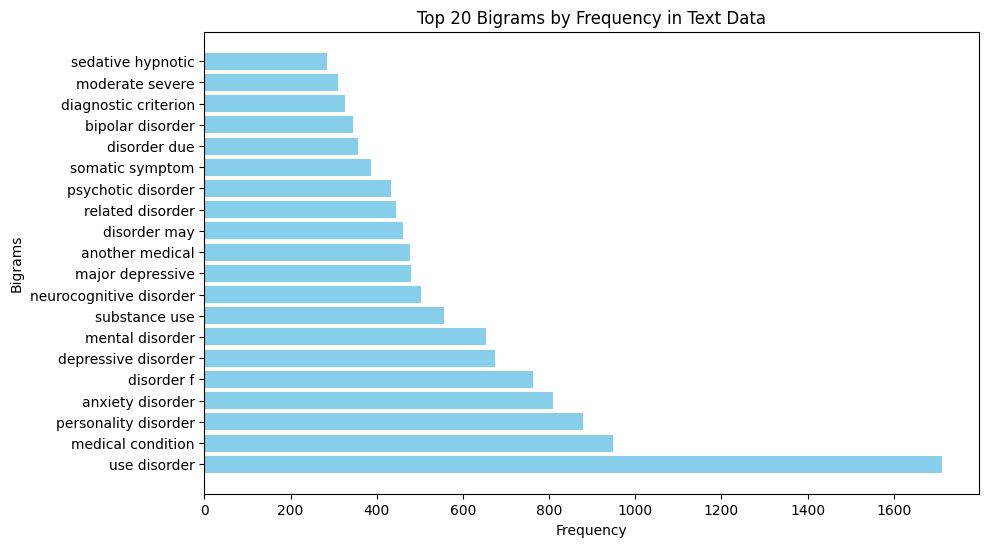

In [9]:
from nltk.util import ngrams

# Step 4: Generate Bigrams
bigrams = list(ngrams(words, 2))

# Step 5: Count the frequency of bigrams
bigrams_freq = Counter(bigrams)

# Step 6: Convert to DataFrame and select top 20 bigrams
bigrams_df = pd.DataFrame(bigrams_freq.items(), columns=['Bigram', 'Frequency']).sort_values(by='Frequency', ascending=False).head(20)

# Plot the top 20 bigrams frequency
plt.figure(figsize=(10, 6))
plt.barh([' '.join(bigram) for bigram in bigrams_df['Bigram']], bigrams_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 20 Bigrams by Frequency in Text Data')
plt.show()

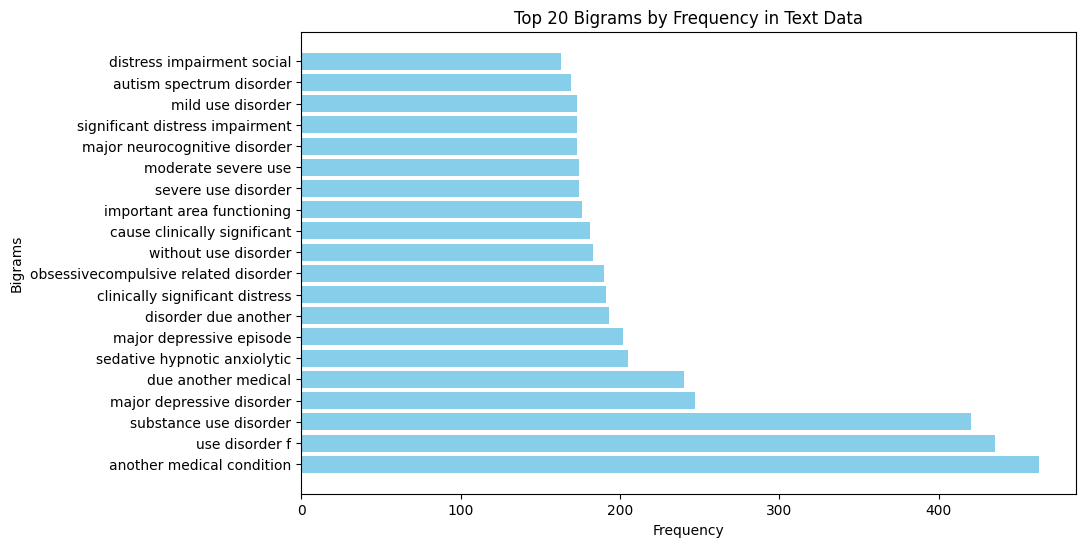

In [10]:
# Step 4: Generate Bigrams
bigrams = list(ngrams(words, 3))

# Step 5: Count the frequency of bigrams
bigrams_freq = Counter(bigrams)

# Step 6: Convert to DataFrame and select top 20 bigrams
bigrams_df = pd.DataFrame(bigrams_freq.items(), columns=['Bigram', 'Frequency']).sort_values(by='Frequency', ascending=False).head(20)

# Plot the top 20 bigrams frequency
plt.figure(figsize=(10, 6))
plt.barh([' '.join(bigram) for bigram in bigrams_df['Bigram']], bigrams_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 20 Bigrams by Frequency in Text Data')
plt.show()

Plotting the word cloud

In [11]:
!pip install wordcloud


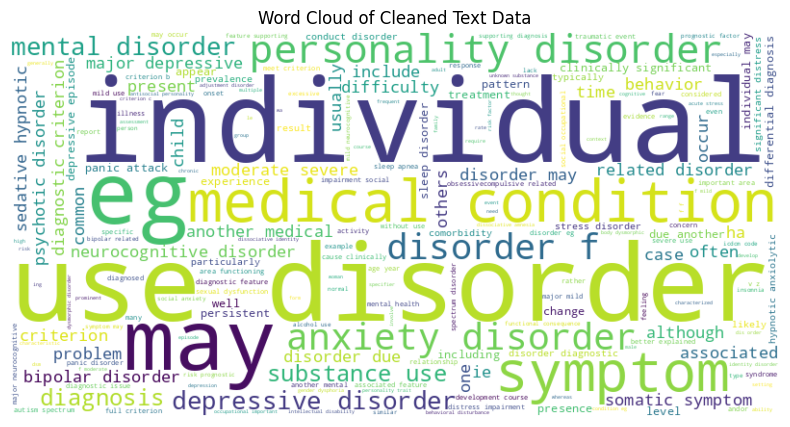

In [12]:
from wordcloud import WordCloud

# Join the words back into a single string for the word cloud
cleaned_text = ' '.join(words)

# Step 4: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Text Data')
plt.show()

Sentiment Analysis

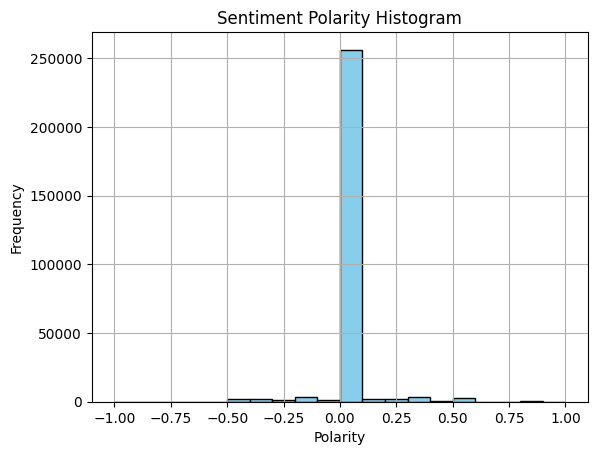

In [13]:
# Convert the list of words to a pandas Series
words_series = pd.Series(words)

# Function to plot polarity histogram
def plot_polarity_histogram(words_series):
    def _polarity(word):
        return TextBlob(word).sentiment.polarity

    polarity_score = words_series.apply(_polarity)
    polarity_score.hist(bins=20, edgecolor='black', color='skyblue')
    plt.xlabel('Polarity')
    plt.ylabel('Frequency')
    plt.title('Sentiment Polarity Histogram')
    plt.show()

# Plot the polarity histogram
plot_polarity_histogram(words_series)

Plotting the readabilitys score

In [14]:
# Readability score - Questions
!pip install textstat


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.3 MB/s eta 0:00:00


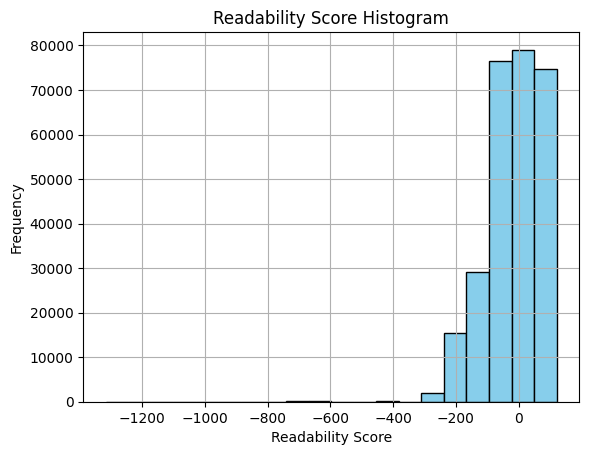

In [15]:
import pandas as pd
import textstat
import matplotlib.pyplot as plt

# Assuming 'cleaned_words' is your list of words from the previous steps
#cleaned_words = ["example", "list", "of", "words"]  # replace with your actual list

# Convert the list of words to a pandas Series
words_series = pd.Series(words)

# Function to plot readability score histogram
def plot_text_complexity_histogram(words_series):
    def readability_score(word):
        return textstat.flesch_reading_ease(word)

    readability_scores = words_series.apply(readability_score)
    readability_scores.hist(bins=20, edgecolor='black', color='skyblue')
    plt.xlabel('Readability Score')
    plt.ylabel('Frequency')
    plt.title('Readability Score Histogram')
    plt.show()

# Plot the readability score histogram
plot_text_complexity_histogram(words_series)


Plotting the most relevant terms

         aa     aaidd    aaidds  aavailable        ab   abandon  abandoned  \
0  0.000285  0.000114  0.000057    0.000114  0.000342  0.000114   0.000285   

   abandoning  abandonment     abate  ...      zinc    zipper   zlement  \
0    0.000057     0.001312  0.000285  ...  0.000057  0.000057  0.000057   

   zodiazepines  zolpidem      zone  zoophilia  zurelike     zures        zx  
0      0.000057  0.000057  0.000228   0.000114  0.000057  0.000171  0.000057  

[1 rows x 13520 columns]


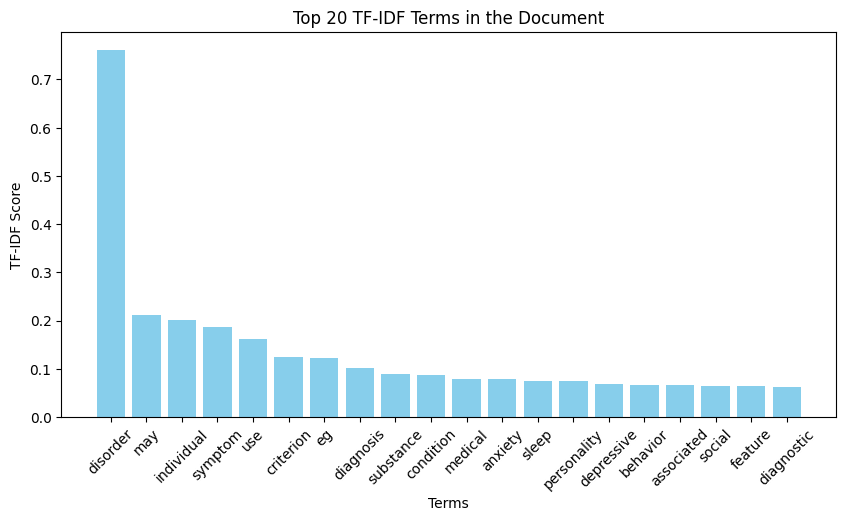

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Assuming 'words' is your list of words from the cleaned data
# Example:
# words = ["This", "is", "a", "sample", "document", "This", "document", "is", "another", "sample", "document", "And", "this", "is", "a", "third", "sample", "document"]

# Convert the list of words into a single string (document)
cleaned_text = ' '.join(words)

# Convert the single document into a list (as TfidfVectorizer expects a list of documents)
documents = [cleaned_text]

# Create the Document-Term Matrix using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Convert to DataFrame for easy visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF matrix
print(tfidf_df)

# Plotting the top N terms by TF-IDF score
def plot_top_tfidf_words(tfidf_df, top_n=20):
    doc = tfidf_df.iloc[0]
    top_words = doc.sort_values(ascending=False).head(top_n)
    plt.figure(figsize=(10, 5))
    plt.bar(top_words.index, top_words.values, color='skyblue')
    plt.xlabel('Terms')
    plt.ylabel('TF-IDF Score')
    plt.title(f'Top {top_n} TF-IDF Terms in the Document')
    plt.xticks(rotation=45)
    plt.show()

# Plot the top 20 TF-IDF words in the single document
plot_top_tfidf_words(tfidf_df, top_n=20)


TOPIC MODELING

Topic: 0 
Words: 0.005*"disorder" + 0.002*"may" + 0.002*"individual" + 0.001*"use" + 0.001*"symptom" + 0.001*"eg" + 0.001*"criterion" + 0.001*"f" + 0.001*"condition" + 0.001*"anxiety"
Topic: 1 
Words: 0.010*"disorder" + 0.004*"individual" + 0.003*"may" + 0.003*"use" + 0.003*"symptom" + 0.002*"f" + 0.002*"criterion" + 0.002*"eg" + 0.002*"condition" + 0.002*"diagnosis"
Topic: 2 
Words: 0.042*"disorder" + 0.015*"symptom" + 0.013*"individual" + 0.010*"may" + 0.009*"use" + 0.008*"eg" + 0.008*"f" + 0.006*"anxiety" + 0.006*"criterion" + 0.006*"condition"
Topic: 3 
Words: 0.005*"disorder" + 0.003*"may" + 0.002*"symptom" + 0.002*"use" + 0.002*"individual" + 0.002*"f" + 0.002*"eg" + 0.001*"criterion" + 0.001*"diagnosis" + 0.001*"condition"
Topic: 4 
Words: 0.051*"disorder" + 0.015*"may" + 0.012*"individual" + 0.011*"use" + 0.009*"symptom" + 0.009*"criterion" + 0.007*"eg" + 0.007*"diagnosis" + 0.006*"substance" + 0.005*"f"


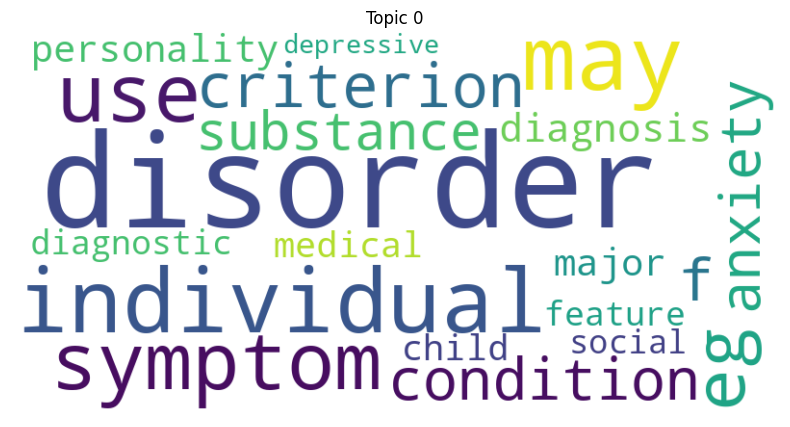

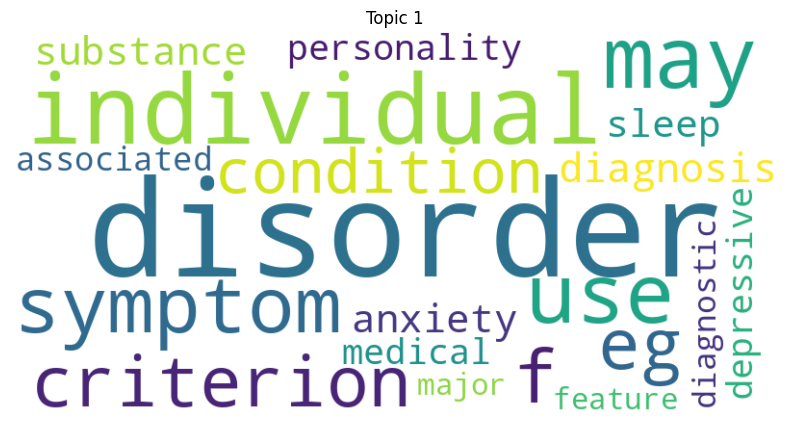

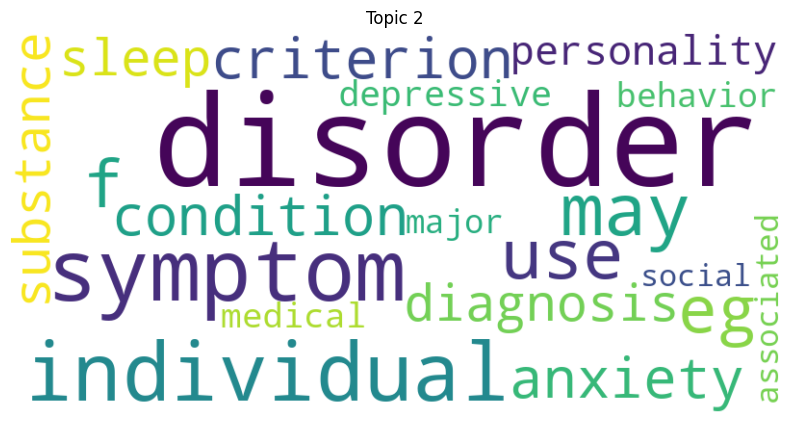

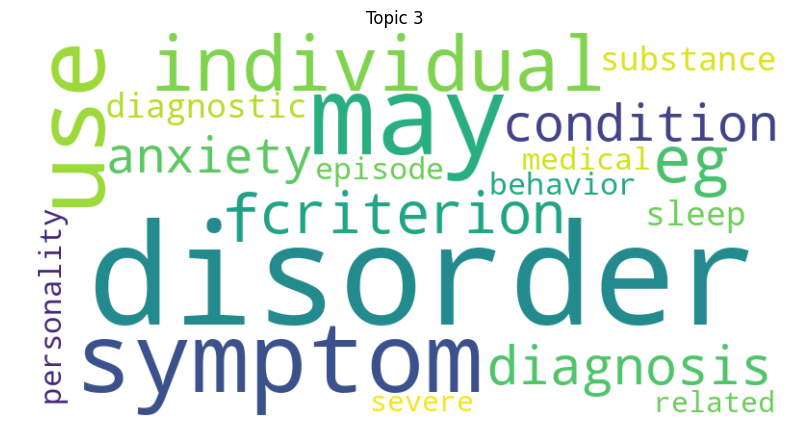

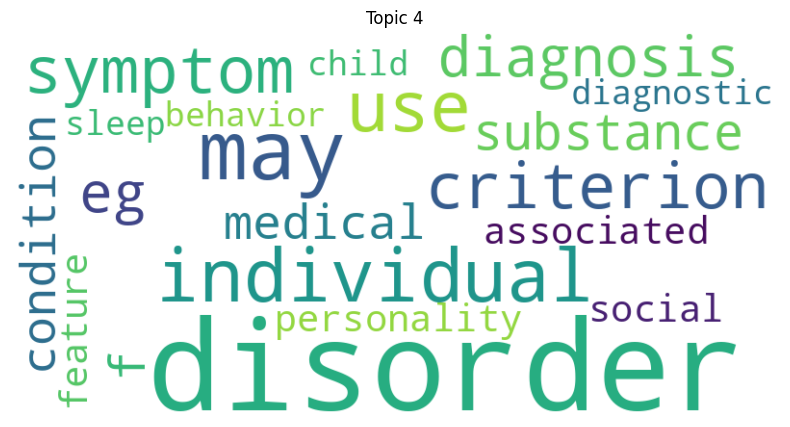

In [17]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'words' is your list of words from the cleaned data
# Convert the list of words into a list of documents (in this case, a single document)
documents = [words]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(documents)

# Convert the documents into a document-term matrix
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Number of topics
num_topics = 5

# Create the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

# Print the topics discovered by the LDA model
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}')

# Visualize the topics using word clouds
for idx, topic in lda_model.print_topics(-1):
    words = dict(lda_model.show_topic(idx, 20))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {idx}')
    plt.show()


Topic 0:
diagnosis disorder feature associated sleep individual symptom child medical use
Topic 1:
substance condition diagnostic child individual use behavior social personality disorder
Topic 2:
condition symptom medical criterion behavior social associated diagnostic personality sleep
Topic 3:
substance sleep personality condition use feature criterion diagnosis social behavior
Topic 4:
diagnostic personality diagnosis condition substance disorder use behavior symptom associated


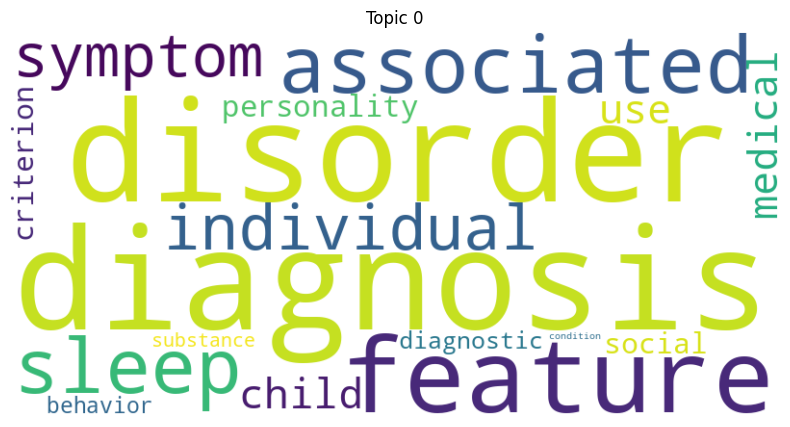

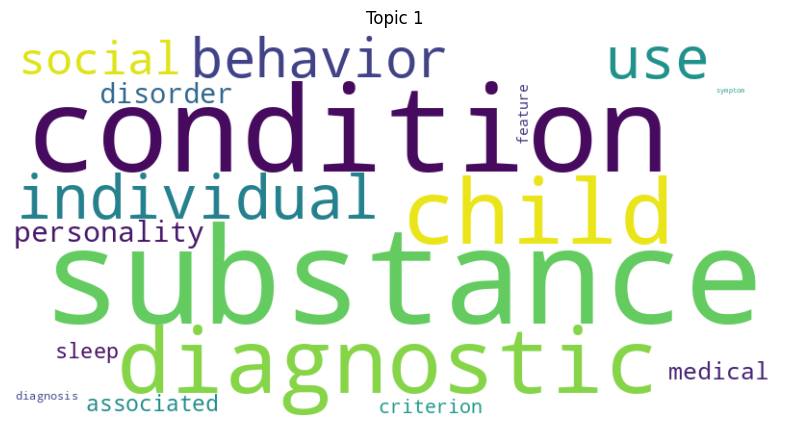

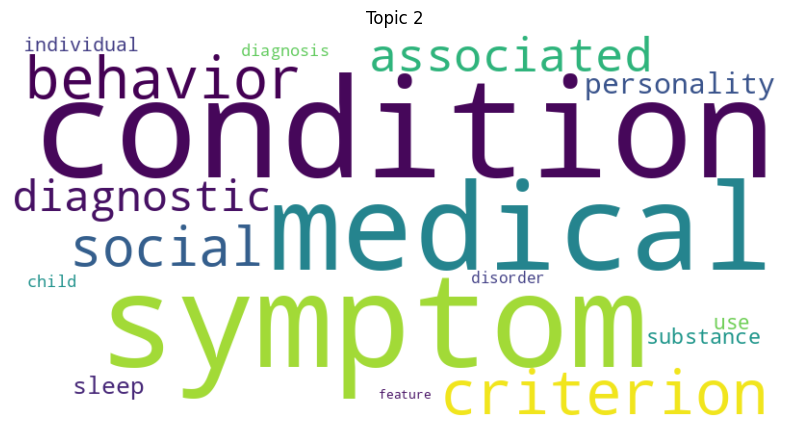

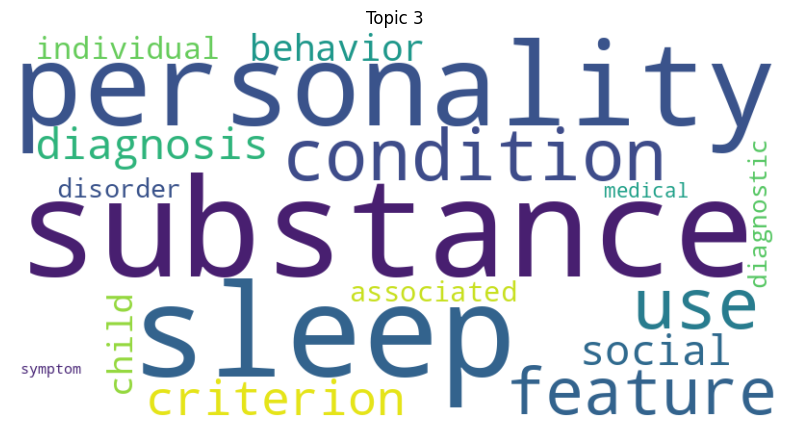

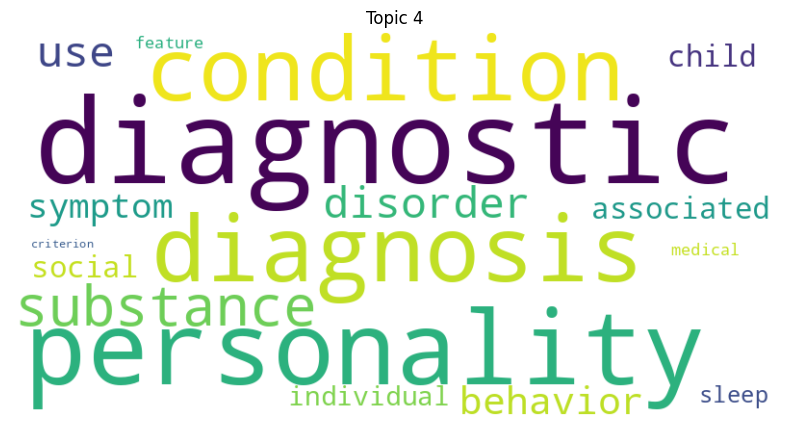

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'words' is your list of words from the cleaned data
# Convert the list of words into a single document
document = ' '.join(words)

# Convert the single document into a list (as TfidfVectorizer expects a list of documents)
documents = [document]

# Step 1: Create the Document-Term Matrix using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Step 2: Apply NMF
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
W = nmf_model.fit_transform(tfidf_matrix)
H = nmf_model.components_

# Step 3: Extract and print the topics
feature_names = tfidf_vectorizer.get_feature_names_out()

def display_topics(H, feature_names, num_top_words):
    for topic_idx, topic in enumerate(H):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

display_topics(H, feature_names, 10)

# Visualize the topics using word clouds
for topic_idx, topic in enumerate(H):
    word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[:-21:-1]}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_idx}')
    plt.show()


Plotting the length of the words in the data

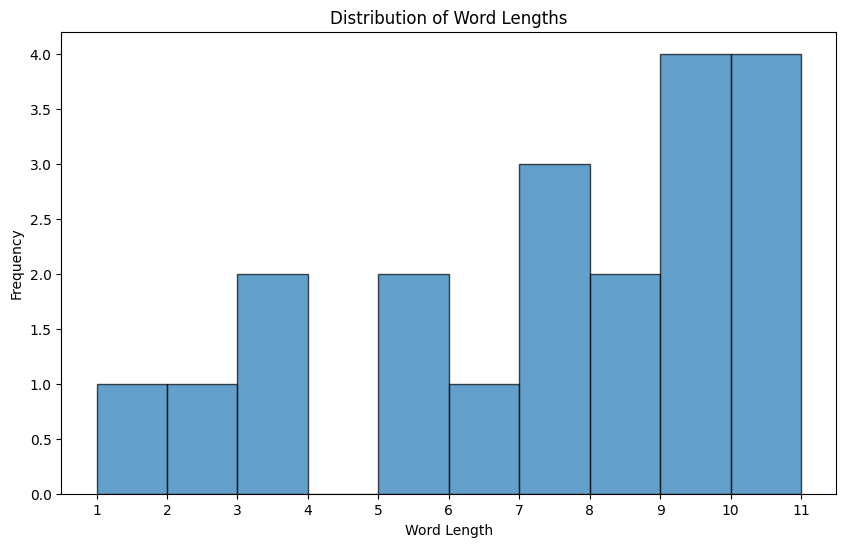

In [19]:
word_lengths = [len(word) for word in words]

# Step 2: Plot the distribution of word lengths
plt.figure(figsize=(10, 6))
plt.hist(word_lengths, bins=range(1, max(word_lengths) + 1), edgecolor='black', alpha=0.7)
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Word Lengths')
plt.xticks(range(1, max(word_lengths) + 1))
plt.show()

Data Anotation

In [22]:
# Join the list of words into a single string
text = ' '.join(words)

# Print the first few hundred characters to check the content
print(text[:500])


disorder may individual use symptom criterion eg diagnosis substance f medical condition personality associated feature social diagnostic child sleep behavior


In [23]:
import spacy

# Load pre-trained SpaCy model
nlp = spacy.load("en_core_web_sm")

# Annotate text
doc = nlp(text)

# Print the entire document to check if it contains entities
for token in doc:
    print(token.text, token.ent_type_)

# Extract and print named entities
for ent in doc.ents:
    print(ent.text, ent.label_)


disorder 
may 
individual 
use 
symptom 
criterion 
eg 
diagnosis 
substance 
f 
medical 
condition 
personality 
associated 
feature 
social 
diagnostic 
child 
sleep 
behavior 
